<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Armin Dehghan

**Student ID**: 400101175



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [48]:
## Import necessary libraries here ##
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

These are from Kaggle : 
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: Percentage of lower status of the population

In [49]:
## Write your code here ##
boston_df = pd.read_csv('Boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
print("\nShape of the dataset:")
print(boston_df.shape)
print("\nSummary statistics of the dataset:")
print(boston_df.describe())



Shape of the dataset:
(506, 14)

Summary statistics of the dataset:
             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.5494

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [51]:
## Write your code here ##
X = boston_df.drop('MEDV', axis=1)  
y = boston_df['MEDV']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)


Coefficients:
    Feature  Coefficient
0      CRIM    -0.114736
1        ZN     0.040452
2     INDUS    -0.002872
3      CHAS     3.486716
4        NX   -18.014143
5        RM     3.728904
6       AGE     0.004547
7       DIS    -1.529426
8       RAD     0.324798
9       TAX    -0.013134
10  PTRATIO    -0.957263
11        B     0.006369
12    LSTAT    -0.557347


In [53]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training set:")
print("R^2: {:.4f}".format(r2_train))
print("RMSE: {:.4f}".format(rmse_train))

print("\nTest set:")
print("R^2: {:.4f}".format(r2_test))
print("RMSE: {:.4f}".format(rmse_test))

Training set:
R^2: 0.7379
RMSE: 4.8908

Test set:
R^2: 0.7418
RMSE: 4.0602


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [54]:
alphas = 10 ** np.linspace(3, -3, 100) * 0.5


mse_train = []
mse_test = []
coefficients = []
not_considered_features = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    
    train_pred_ridge = ridge_reg.predict(X_train)
    test_pred_ridge = ridge_reg.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, train_pred_ridge))
    mse_test.append(mean_squared_error(y_test, test_pred_ridge))
    
    coefficients.append(ridge_reg.coef_)
    

    not_considered_features.append(np.sum(np.abs(ridge_reg.coef_) <= np.max(0.01 *ridge_reg.coef_)))
    




 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

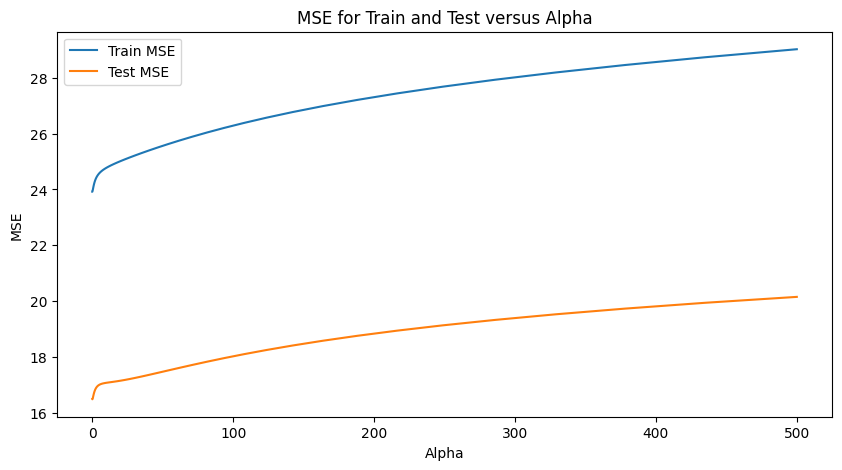

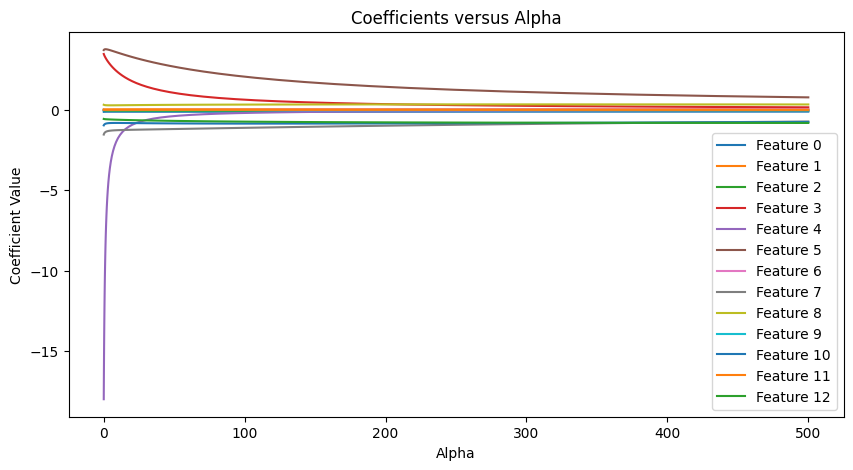

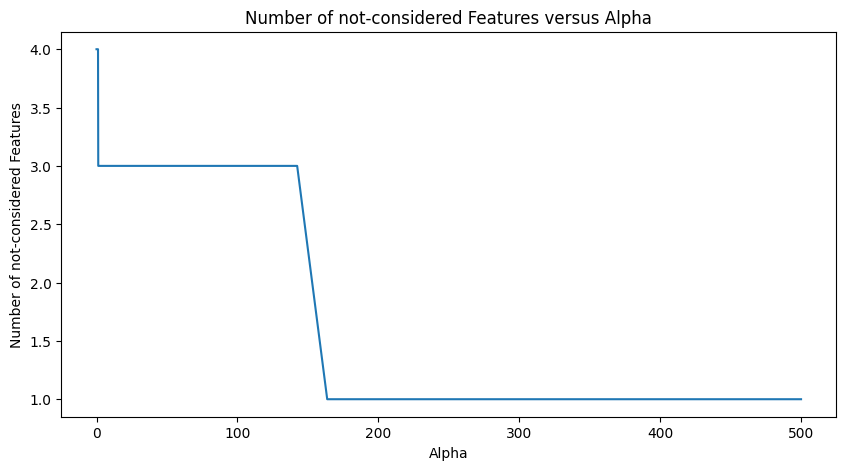

Ridge Regression Results with Optimal Alpha:
Optimal Alpha: 0.08737642000038415
R^2 (Train): 0.7378357582040516
R^2 (Test): 0.7418474553330917
RMSE (Train): 4.891301859162187
RMSE (Test): 4.059476280327878
Coefficients: [-1.14137514e-01  4.05789662e-02 -8.04882881e-03  3.46572463e+00
 -1.66800343e+01  3.73936547e+00  3.40899676e-03 -1.50741376e+00
  3.21049459e-01 -1.31940091e-02 -9.43028533e-01  6.42243940e-03
 -5.59318215e-01]
Linear Regression Results :
Training set:
R^2: 0.7379
RMSE: 4.8908
Test set:
R^2: 0.7418
RMSE: 4.0602


In [56]:

plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label='Feature {}'.format(i))
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of not-considered Features')
plt.title('Number of not-considered Features versus Alpha')
plt.show()


optimal_alpha_index = np.argmin(mse_test)
optimal_alpha = alphas[optimal_alpha_index]


ridge_reg_optimal = Ridge(alpha=optimal_alpha)
ridge_reg_optimal.fit(X_train, y_train)
train_pred_ridge_optimal = ridge_reg_optimal.predict(X_train)
test_pred_ridge_optimal = ridge_reg_optimal.predict(X_test)


r2_ridge_optimal_train = r2_score(y_train, train_pred_ridge_optimal)
r2_ridge_optimal_test = r2_score(y_test, test_pred_ridge_optimal)
rmse_ridge_optimal_test = np.sqrt(mean_squared_error(y_test, test_pred_ridge_optimal))
rmse_ridge_optimal_train = np.sqrt(mean_squared_error(y_train, train_pred_ridge_optimal))


print("Ridge Regression Results with Optimal Alpha:")
print("Optimal Alpha:", optimal_alpha)
print("R^2 (Train):", r2_ridge_optimal_train)
print("R^2 (Test):", r2_ridge_optimal_test)
print("RMSE (Train):", rmse_ridge_optimal_train)
print("RMSE (Test):", rmse_ridge_optimal_test)
print("Coefficients:", ridge_reg_optimal.coef_)

print("Linear Regression Results :")
print("Training set:")
print("R^2: {:.4f}".format(r2_train))
print("RMSE: {:.4f}".format(rmse_train))
print("Test set:")
print("R^2: {:.4f}".format(r2_test))
print("RMSE: {:.4f}".format(rmse_test))

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

## Where to Use Lasso Regression

Lasso regression, also known as L1 regularization, is particularly useful in scenarios where you suspect that only a small number of features are relevant for making predictions, while the rest may be irrelevant or redundant. Here are some specific situations where lasso regression can be beneficial:

1. **High-dimensional data:** When you have a dataset with a large number of features compared to the number of samples, lasso regression can help by automatically performing feature selection, potentially reducing overfitting and improving model generalization.

2. **Sparse data:** In datasets where most features are irrelevant or have negligible effects on the target variable, lasso regression can effectively shrink the coefficients of irrelevant features to zero, effectively performing feature selection and simplifying the model.

3. **Multicollinearity:** When features are highly correlated with each other, ordinary least squares (OLS) regression may produce unstable estimates of the coefficients. Lasso regression can handle multicollinearity by penalizing the absolute size of the coefficients, effectively selecting one feature from a group of correlated features.

4. **Interpretability:** If you need a more interpretable model by eliminating irrelevant features and focusing only on the most important ones, lasso regression can provide a sparse model with a subset of relevant features and non-zero coefficients, making it easier to understand and interpret.

5. **Regularization:** Lasso regression is a form of regularization that helps prevent overfitting by penalizing large coefficients. It adds a penalty term to the loss function, which encourages simpler models with fewer features, leading to improved generalization performance.

So, in summary, consider using lasso regression when dealing with high-dimensional, sparse, or multicollinear data, or when you need a more interpretable model with automatic feature selection and regularization.


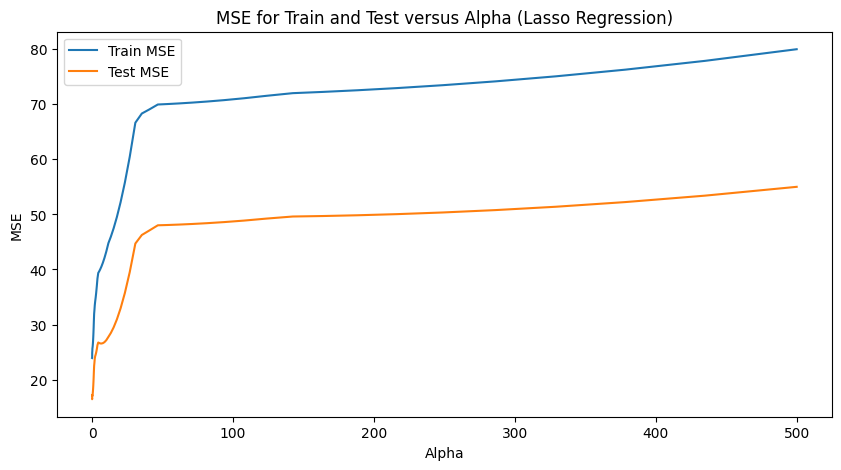

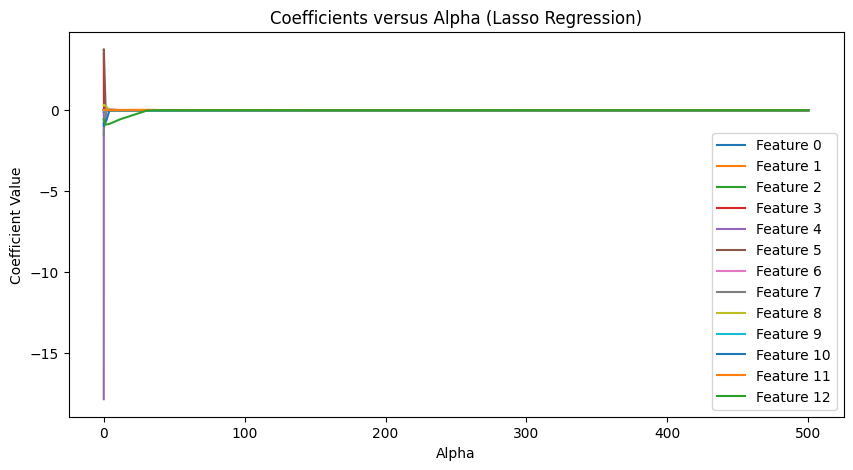

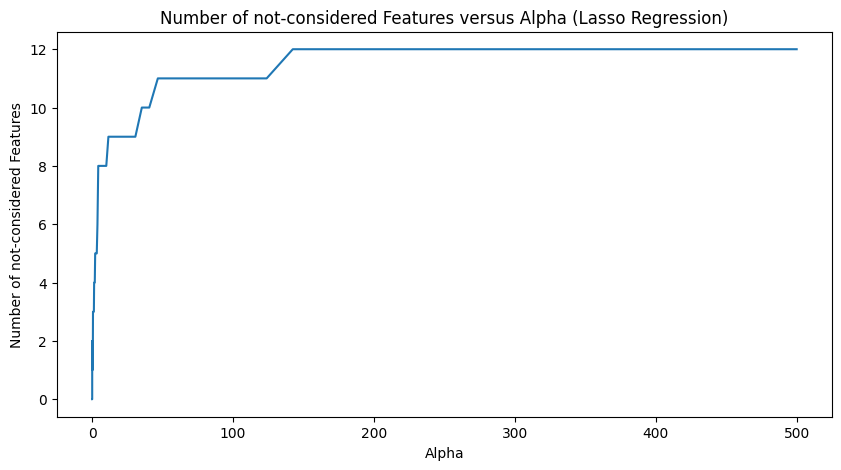

Lasso Regression Results with Optimal Alpha:
Optimal Alpha: 0.009369087114301915
R^2 (Train): 0.7375253530843122
R^2 (Test): 0.7424364746495242
RMSE (Train): 23.95316112327074
RMSE (Test): 16.441747211821003
Coefficients: [-1.13142627e-01  4.08194512e-02 -1.37646633e-02  3.31257477e+00
 -1.46962966e+01  3.73612352e+00  2.16345746e-03 -1.46946050e+00
  3.16292745e-01 -1.33500088e-02 -9.22701949e-01  6.51743557e-03
 -5.64410353e-01]
Linear Regression Results :
Training set:
R^2: 0.7379
RMSE: 4.8908
Test set:
R^2: 0.7418
RMSE: 4.0602


In [58]:
mse_train_lasso = []
mse_test_lasso = []
coefficients_lasso = []
not_considered_features_lasso = []

for alpha in alphas:
    
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    
    train_pred_lasso = lasso_reg.predict(X_train)
    test_pred_lasso = lasso_reg.predict(X_test)
    
    mse_train_lasso.append(mean_squared_error(y_train, train_pred_lasso))
    mse_test_lasso.append(mean_squared_error(y_test, test_pred_lasso))
    
    coefficients_lasso.append(lasso_reg.coef_)
    
    not_considered_features_lasso.append(np.sum(lasso_reg.coef_ == 0))


plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train_lasso, label='Train MSE')
plt.plot(alphas, mse_test_lasso, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha (Lasso Regression)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
coefficients_lasso = np.array(coefficients_lasso)
for i in range(coefficients_lasso.shape[1]):
    plt.plot(alphas, coefficients_lasso[:, i], label='Feature {}'.format(i))
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha (Lasso Regression)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features_lasso)
plt.xlabel('Alpha')
plt.ylabel('Number of not-considered Features')
plt.title('Number of not-considered Features versus Alpha (Lasso Regression)')
plt.show()


optimal_alpha_index_lasso = np.argmin(mse_test_lasso)
optimal_alpha_lasso = alphas[optimal_alpha_index_lasso]


lasso_reg_optimal = Lasso(alpha=optimal_alpha_lasso)
lasso_reg_optimal.fit(X_train, y_train)
train_pred_lasso_optimal = lasso_reg_optimal.predict(X_train)
test_pred_lasso_optimal = lasso_reg_optimal.predict(X_test)


r2_lasso_optimal_train = r2_score(y_train, train_pred_lasso_optimal)
r2_lasso_optimal_test = r2_score(y_test, test_pred_lasso_optimal)
rmse_lasso_optimal_test= mean_squared_error(y_test, test_pred_lasso_optimal)
rmse_lasso_optimal_train= mean_squared_error(y_train, train_pred_lasso_optimal)

print("Lasso Regression Results with Optimal Alpha:")
print("Optimal Alpha:", optimal_alpha_lasso)
print("R^2 (Train):", r2_lasso_optimal_train)
print("R^2 (Test):", r2_lasso_optimal_test)
print("RMSE (Train):", rmse_lasso_optimal_train)
print("RMSE (Test):", rmse_lasso_optimal_test)
print("Coefficients:", lasso_reg_optimal.coef_)

print("Linear Regression Results :")
print("Training set:")
print("R^2: {:.4f}".format(r2_train))
print("RMSE: {:.4f}".format(rmse_train))
print("Test set:")
print("R^2: {:.4f}".format(r2_test))
print("RMSE: {:.4f}".format(rmse_test))



**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

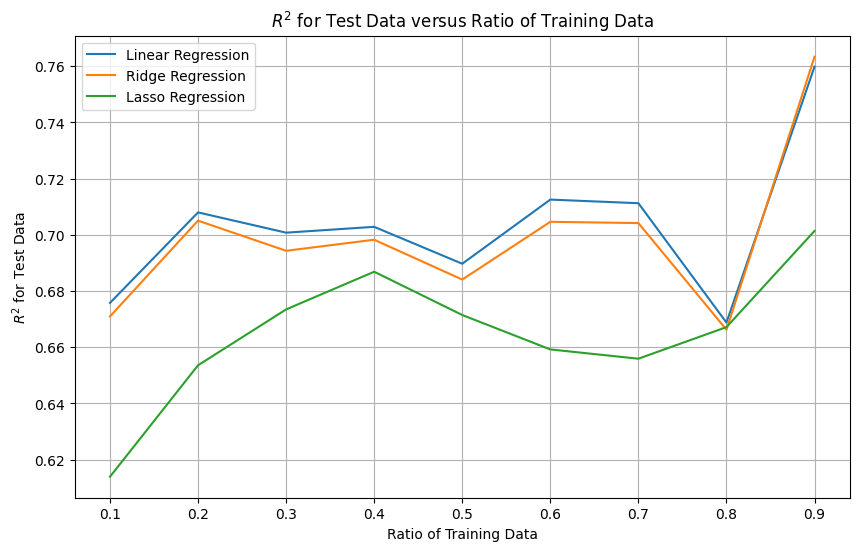

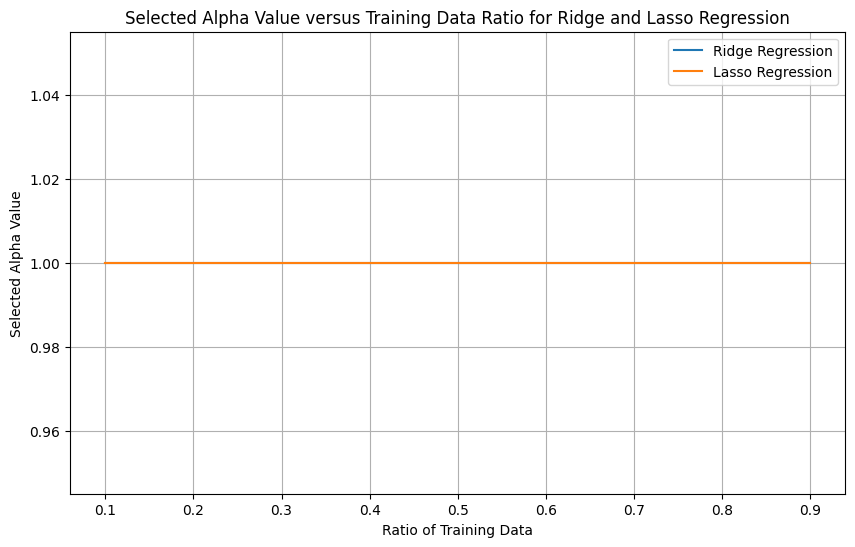

In [60]:
training_ratios = np.linspace(0.1, 0.9, 9)


r2_linear = []
r2_ridge = []
r2_lasso = []
alphas_ridge = []
alphas_lasso = []

for ratio in training_ratios:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - ratio), random_state=42)
    
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    r2_linear.append(r2_score(y_test, linear_reg.predict(X_test)))
    
    ridge_reg = Ridge()
    ridge_reg.fit(X_train, y_train)
    r2_ridge.append(r2_score(y_test, ridge_reg.predict(X_test)))
    alphas_ridge.append(ridge_reg.get_params()['alpha']) 
    
    lasso_reg = Lasso()
    lasso_reg.fit(X_train, y_train)
    r2_lasso.append(r2_score(y_test, lasso_reg.predict(X_test)))
    alphas_lasso.append(lasso_reg.get_params()['alpha']) 

plt.figure(figsize=(10, 6))
plt.plot(training_ratios, r2_linear, label='Linear Regression')
plt.plot(training_ratios, r2_ridge, label='Ridge Regression')
plt.plot(training_ratios, r2_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ for Test Data')
plt.title('$R^2$ for Test Data versus Ratio of Training Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_ratios, alphas_ridge, label='Ridge Regression')
plt.plot(training_ratios, alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value versus Training Data Ratio for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

- As the ratio of training data increases, the $R^2$ scores generally increase for all three regression methods.
- Ridge regression and Lasso regression exhibit similar behavior, with slightly higher $R^2$ scores compared to linear regression, particularly noticeable when the training set is small, suggesting better generalization and overfitting prevention.

For both Ridge regression and Lasso regression, alpha values are the same.